In [10]:
import numpy as np
test = np.random.binomial(1, 0.1, 1)
print(bool(test))

False


In [11]:
import matplotlib.font_manager as fm

# 列出所有可用字体及路径
for font in fm.findSystemFonts(fontpaths=None, fontext='ttf'):
    print(font)

C:\Users\25105\AppData\Local\Microsoft\Windows\Fonts\LeelawUI.ttf
C:\Windows\Fonts\trebucit.ttf
C:\Windows\Fonts\Gabriola.ttf
C:\Windows\Fonts\LHANDW.TTF
C:\Users\25105\AppData\Local\Microsoft\Windows\Fonts\PERTIBD.TTF
C:\Windows\Fonts\LeelUIsl.ttf
C:\Users\25105\AppData\Local\Microsoft\Windows\Fonts\PingFangTC-Mod-17.d1e2-Light.otf
C:\Windows\Fonts\euextrab.ttf
C:\Windows\Fonts\simsunb.ttf
C:\Users\25105\AppData\Local\Microsoft\Windows\Fonts\BKANT.TTF
C:\Windows\Fonts\trebucbd.ttf
C:\Users\25105\AppData\Local\Microsoft\Windows\Fonts\FZYTK.TTF
C:\Users\25105\AppData\Local\Microsoft\Windows\Fonts\ITCEDSCR.TTF
C:\Users\25105\AppData\Local\Microsoft\Windows\Fonts\BOD_CI.TTF
C:\Users\25105\AppData\Local\Microsoft\Windows\Fonts\Mathematica2mb.ttf
C:\Users\25105\AppData\Local\Microsoft\Windows\Fonts\Mathematica5mb.ttf
C:\Users\25105\AppData\Local\Microsoft\Windows\Fonts\BOOKOS.TTF
C:\Users\25105\AppData\Local\Microsoft\Windows\Fonts\SourceHanSansCN-Regular.otf
C:\Users\25105\AppData\Local\Mi

In [12]:
import pandas as pd
import numpy as np

class Component:
    def __init__(self, CHECK, defect_rate, purchase_price, inspection_cost):
        self.cost = 0
        self.defect_rate = defect_rate
        self.purchase_price = purchase_price
        self.inspection_cost = inspection_cost
        self.defect = False
        self.CHECK = CHECK
        self.new()

    def new(self):
        self.cost += self.purchase_price
        self.defect = np.random.random() < self.defect_rate

    def check(self):
        self.cost += self.inspection_cost
        while self.defect:
            self.new()
            self.cost += self.inspection_cost

    def count(self):
        return 0 - self.cost

class Product:
    def __init__(self, CHECK, DISASSEMBLE, defect_rate, assembly_cost, inspection_cost, market_price, replacement_loss, disassembly_cost, components):
        self.cost = 0
        self.revenue = 0
        self.components = components
        self.defect_rate = defect_rate
        self.assembly_cost = assembly_cost
        self.inspection_cost = inspection_cost
        self.market_price = market_price
        self.replacement_loss = replacement_loss
        self.disassembly_cost = disassembly_cost
        self.defect = False
        self.CHECK = CHECK
        self.DISASSEMBLE = DISASSEMBLE
        self.DROP = False
        self.assemble()

    def assemble(self):
        self.defect = False
        self.cost += self.assembly_cost
        for component in self.components:
            if component.defect:
                self.defect = True
                break
        if not self.defect:
            self.defect = np.random.random() < self.defect_rate

    def drop(self):
        self.DROP = True

    def disassemble(self):
        self.cost += self.disassembly_cost
        for component in self.components:
            component.check()
        self.assemble()

    def check(self):
        self.cost += self.inspection_cost
        if self.defect:
            if self.DISASSEMBLE:
                self.disassemble()
                self.check()
            else:
                self.drop()

    def sell(self):
        if self.DROP:
            return self.count()
        else:
            self.revenue += self.market_price
            if self.defect:
                self.cost += self.replacement_loss
                self.disassemble()
                self.check()
            return self.count()

    def count(self):
        return self.revenue - self.cost

def simulation(c_params, p_param):
    components = []
    for param in c_params:
        component = Component(param[0], param[1], param[2], param[3])
        if component.CHECK:
            component.check()
        components.append(component)

    p_param.append(components)
    product = Product(p_param[0], p_param[1], p_param[2], p_param[3], p_param[4], p_param[5], p_param[6], p_param[7], p_param[8])
    if product.CHECK:
        product.check()
    revenue = product.sell()
    for component in product.components:
        revenue += component.count()
    return revenue

# 测试代码
states = [True, False]
num_simulations = 10000

c1_params = [True, 0.1, 4, 2]
c2_params = [True, 0.1, 18, 3]
p_params = [True, True, 0.1, 6, 3, 56, 6, 5]

for inspect_comp1 in states:
    for inspect_comp2 in states:
        for inspect_product in states:
            for disassemble in states:
                c1_params[0] = inspect_comp1
                c2_params[0] = inspect_comp2
                p_params[0] = inspect_product
                p_params[1] = disassemble

                profits = []
                for _ in range(num_simulations):
                    profit = simulation([c1_params, c2_params], p_params[:])
                    profits.append(profit)

                average_profit = sum(profits) / num_simulations
                print(f"零部件1检查: {inspect_comp1}, 零部件2检查: {inspect_comp2}, 产品检查: {inspect_product}, 次品拆解: {disassemble}")
                print(f"平均利润: {average_profit:.4f}")
                print()

零部件1检查: True, 零部件2检查: True, 产品检查: True, 次品拆解: True
平均利润: 14.9140

零部件1检查: True, 零部件2检查: True, 产品检查: True, 次品拆解: False
平均利润: 11.2571

零部件1检查: True, 零部件2检查: True, 产品检查: False, 次品拆解: True
平均利润: 17.2895

零部件1检查: True, 零部件2检查: True, 产品检查: False, 次品拆解: False
平均利润: 17.6215

零部件1检查: True, 零部件2检查: False, 产品检查: True, 次品拆解: True
平均利润: 15.9323

零部件1检查: True, 零部件2检查: False, 产品检查: True, 次品拆解: False
平均利润: 11.3366

零部件1检查: True, 零部件2检查: False, 产品检查: False, 次品拆解: True
平均利润: 17.8764

零部件1检查: True, 零部件2检查: False, 产品检查: False, 次品拆解: False
平均利润: 18.1957

零部件1检查: False, 零部件2检查: True, 产品检查: True, 次品拆解: True
平均利润: 14.8594

零部件1检查: False, 零部件2检查: True, 产品检查: True, 次品拆解: False
平均利润: 8.9429

零部件1检查: False, 零部件2检查: True, 产品检查: False, 次品拆解: True
平均利润: 16.8235

零部件1检查: False, 零部件2检查: True, 产品检查: False, 次品拆解: False
平均利润: 17.3890

零部件1检查: False, 零部件2检查: False, 产品检查: True, 次品拆解: True
平均利润: 16.2321

零部件1检查: False, 零部件2检查: False, 产品检查: True, 次品拆解: False
平均利润: 9.9864

零部件1检查: False, 零部件2检查: False, 产品检查: False, 次品拆解: True

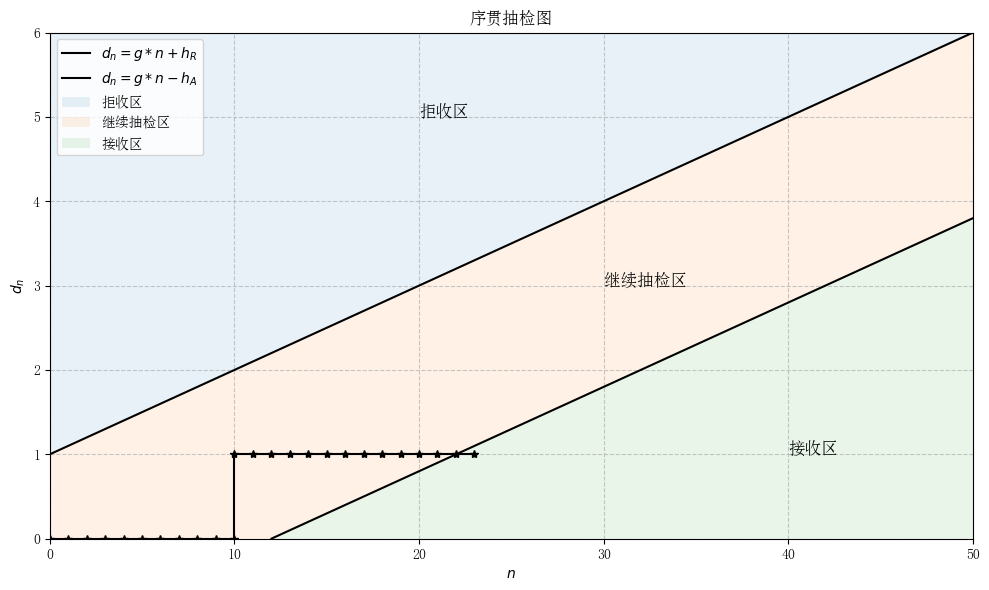

In [28]:
import matplotlib.pyplot as plt
import numpy as np
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimSun']
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.unicode_minus'] = False
# 设置图形大小
plt.figure(figsize=(10, 6))

# 生成数据
n = np.linspace(0, 50, 1000)  # 增加点的数量以获得更平滑的曲线
d_n_upper = 0.1 * n + 1
d_n_lower = 0.1 * n - 1.2

# 找到下限线与x轴的交点
x_intercept = 12  # 1.2 / 0.1 = 12

# 创建掩码，只保留第一象限的数据
mask_upper = (n >= 0) & (d_n_upper >= 0)
mask_lower = (n >= x_intercept) & (d_n_lower >= 0)

# 绘制上下限线
plt.plot(n[mask_upper], d_n_upper[mask_upper], 'k-', label='$d_n = g*n + h_R$')
plt.plot(n[mask_lower], d_n_lower[mask_lower], 'k-', label='$d_n = g*n - h_A$')

# 填充区域
plt.fill_between(n[mask_upper], d_n_upper[mask_upper], 6, alpha=0.1, label='拒收区')
plt.fill_between(n[mask_upper], np.maximum(d_n_lower, 0)[mask_upper], d_n_upper[mask_upper], alpha=0.1, label='继续抽检区')
plt.fill_between(n[mask_lower], 0, d_n_lower[mask_lower], alpha=0.1, label='接收区')

# 设置坐标轴
plt.xlim(0, 50)
plt.ylim(0, 6)
plt.xlabel('$n$')
plt.ylabel('$d_n$')

# 添加文本标签
plt.text(20, 5, '拒收区', fontsize=12)
plt.text(30, 3, '继续抽检区', fontsize=12)
plt.text(40, 1, '接收区', fontsize=12)

# 添加图例
plt.legend(loc='upper left')

# 添加网格线
plt.grid(True, linestyle='--', alpha=0.7)

# 添加示例点
plt.plot([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], 
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1], 'k*-')

# 添加标题
plt.title('序贯抽检图')

# 显示图形
plt.tight_layout()
plt.savefig('./fig/序贯抽检图.svg')
plt.show()